In [13]:
from qiskit import* ## importing the library that necessary for quantum computing 
from qiskit.visualization import plot_histogram, array_to_latex, plot_bloch_multivector , plot_state_qsphere ## importing visualization tools for quantum computing 
from math import pi
from qiskit_aer import Aer
%matplotlib inline

In [14]:
#implementation of the superdence coding 
circuit = QuantumCircuit(2)

#prepearing the bell state and distribute qubits
circuit.h(0)
circuit.cx(0, 1)

#olivia encode her message and transmits her qubit to barror

match message := '10': #the message
    case '00':
        circuit.id(0)
    case '01':
        circuit.z(0)
    case '10':
        circuit.x(0)
    case '11':
        circuit.z(1)
        circuit.x(0)

circuit.barrier()

#barron decode the olivia's message 

circuit.cx(0, 1)
circuit.h(0)

#barron measures the qubits to  read olivia's message 
circuit.measure_all()
print(circuit)
    

        ┌───┐     ┌───┐ ░      ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├──■──┤ X ├─░───■──┤ H ├─░─┤M├───
        └───┘┌─┴─┐└───┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
   q_1: ─────┤ X ├──────░─┤ X ├──────░──╫─┤M├
             └───┘      ░ └───┘      ░  ║ └╥┘
meas: 2/════════════════════════════════╩══╩═
                                        0  1 


In [15]:
#simulator = Aer.get_backend('qasm_simulator')
#result = transpile(circuit, backend=simulator).result()
#plot_histogram(result.get_counts())

In [16]:

# 
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(circuit, simulator)
sim_result = simulator.run(compiled_circuit).result()
counts = sim_result.get_counts()

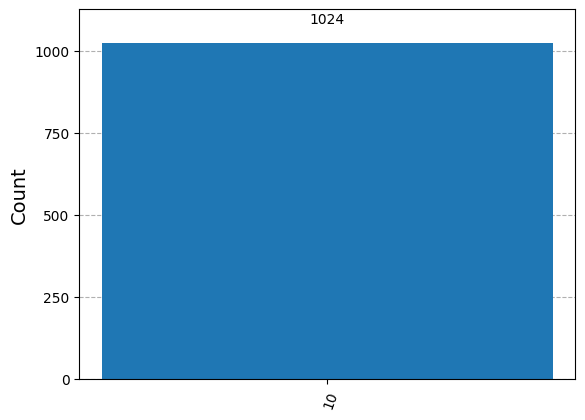

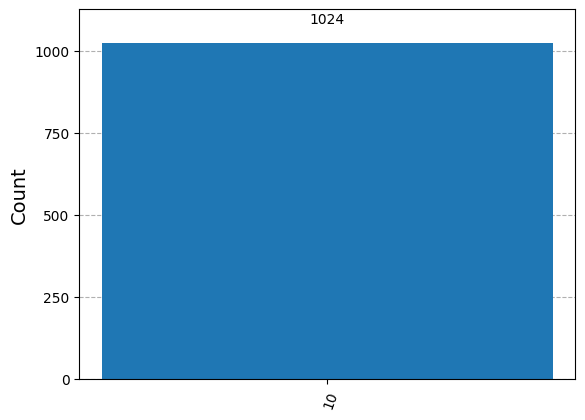

In [17]:
plot_histogram(counts)